# Reading data

In [2]:
import pandas as pd 

df = pd.read_csv("https://raw.githubusercontent.com/MicrosoftDocs/ml-basics/master/challenges/data/real_estate.csv")
df.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


# Cheacking for missing values

In [3]:
df.isnull().sum()

transaction_date            0
house_age                   0
transit_distance            0
local_convenience_stores    0
latitude                    0
longitude                   0
price_per_unit              0
dtype: int64

# Define categorical and numeric variables

In [6]:
numeric = df[['house_age', 'transit_distance', 'latitude', 'longitude']]
categorical = df[['transaction_date', 'local_convenience_stores']]
print(numeric.head())
print(categorical.head())


   house_age  transit_distance  latitude  longitude
0       32.0          84.87882  24.98298  121.54024
1       19.5         306.59470  24.98034  121.53951
2       13.3         561.98450  24.98746  121.54391
3       13.3         561.98450  24.98746  121.54391
4        5.0         390.56840  24.97937  121.54245
   transaction_date  local_convenience_stores
0          2012.917                        10
1          2012.917                         9
2          2013.583                         5
3          2013.500                         5
4          2012.833                         5


# Pearson's correlation 

In [14]:
print(df.corr())


                          transaction_date  house_age  transit_distance  \
transaction_date                  1.000000   0.017549          0.060880   
house_age                         0.017549   1.000000          0.025622   
transit_distance                  0.060880   0.025622          1.000000   
local_convenience_stores          0.009635   0.049593         -0.602519   
latitude                          0.035058   0.054420         -0.591067   
longitude                        -0.041082  -0.048520         -0.806317   
price_per_unit                    0.087491  -0.210567         -0.673613   

                          local_convenience_stores  latitude  longitude  \
transaction_date                          0.009635  0.035058  -0.041082   
house_age                                 0.049593  0.054420  -0.048520   
transit_distance                         -0.602519 -0.591067  -0.806317   
local_convenience_stores                  1.000000  0.444143   0.449099   
latitude                

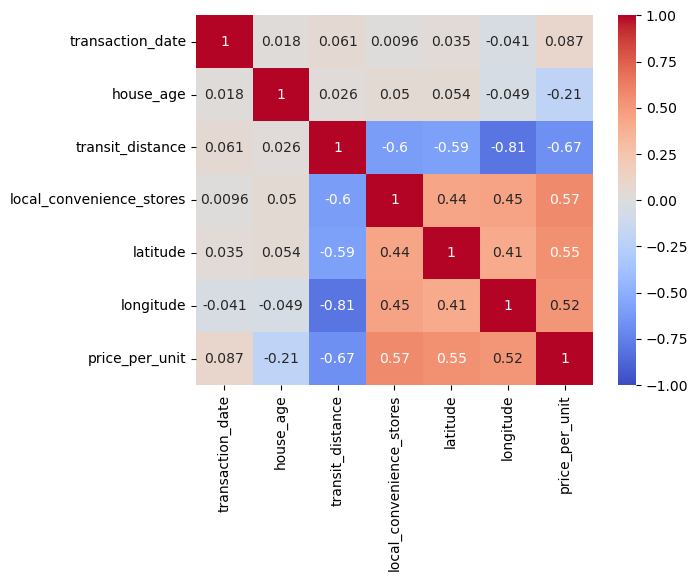

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

#Creating the corr matrix
#corr_matrix = df.loc[:, numeric.columns].join(df['price_per_unit']).corr()

corr_matrix = df.corr()

#visualize it on a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.show()


# it seems that 'transit_distance' and 'local_convinience_stores' are the ones with higher correlation with 'price_per_unit'


C:\Users\Jesus Sanchez\AppData\Local\Temp\ipykernel_29580\3192439705.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


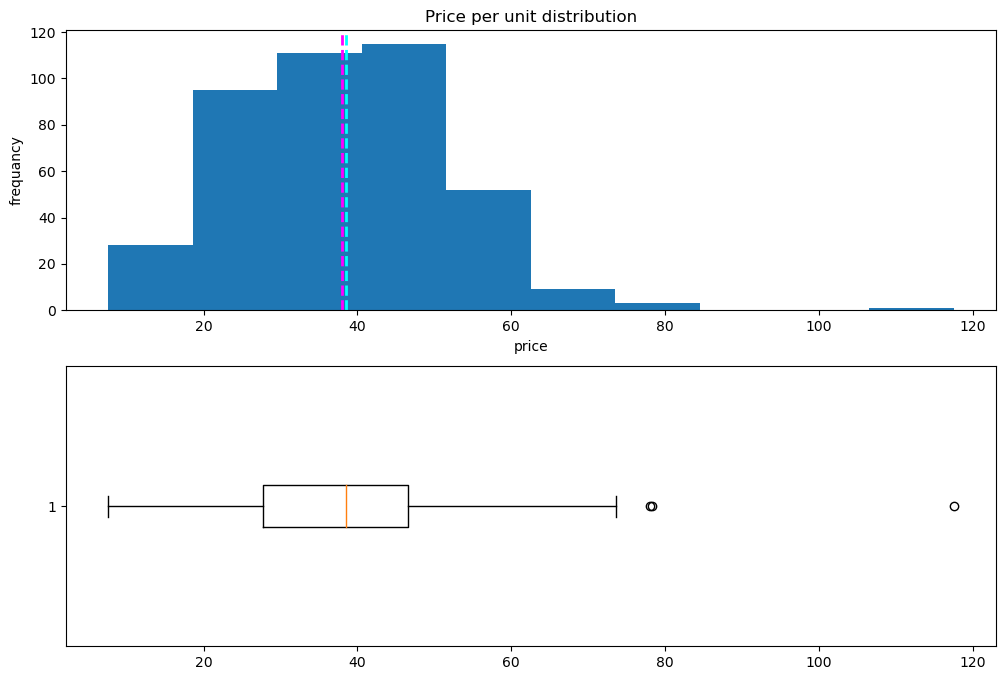

In [20]:
from matplotlib import pyplot as plt

#Creating a histogram and a boxplot

fig, ax = plt.subplots(2,1, figsize=(12, 8))

ax[0].hist(df['price_per_unit'])
ax[0].axvline(df['price_per_unit'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(df['price_per_unit'].median(), color='cyan', linestyle='dashed', linewidth=2)
ax[0].set_xlabel('price')
ax[0].set_ylabel('frequancy')
ax[0].set_title('Price per unit distribution')

ax[1].boxplot(df.price_per_unit, vert=False)

fig.show();

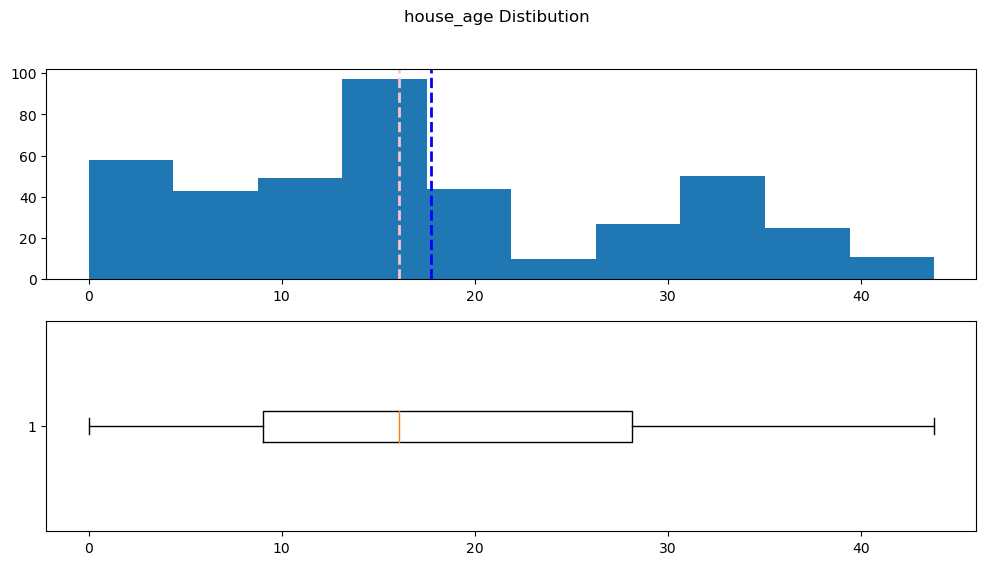

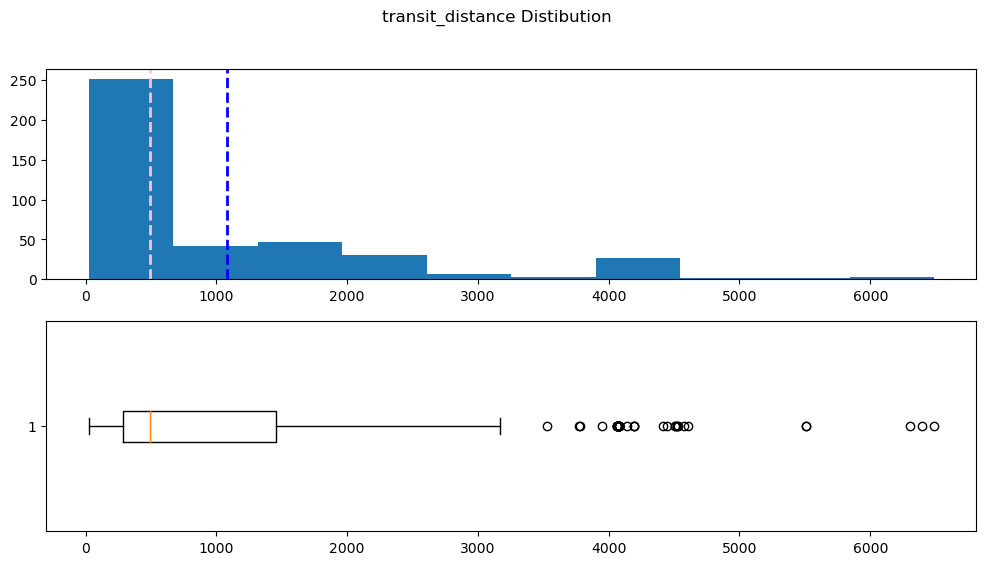

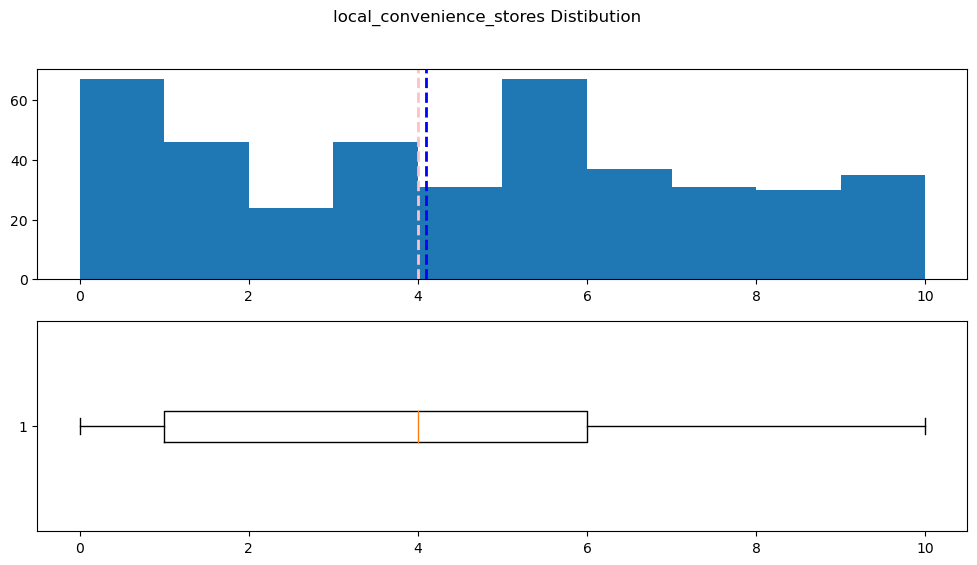

In [77]:
for col in numeric:

    fig, ax = plt.subplots(2,1, figsize=(12,6))

    feature = numeric[[col]]
    ax[0].hist(feature)
    ax[0].axvline(feature[col].mean(), color="blue", linestyle="dashed", linewidth=2)
    ax[0].axvline(feature[col].median(), color='pink', linestyle="dashed", linewidth=2)

    ax[1].boxplot(feature, vert=False)

    fig.suptitle(col + ' Distibution')

    plt.show()

# We see some outliers on 'price_per_unit' and 'transit distance'. Let's count and remove them

5


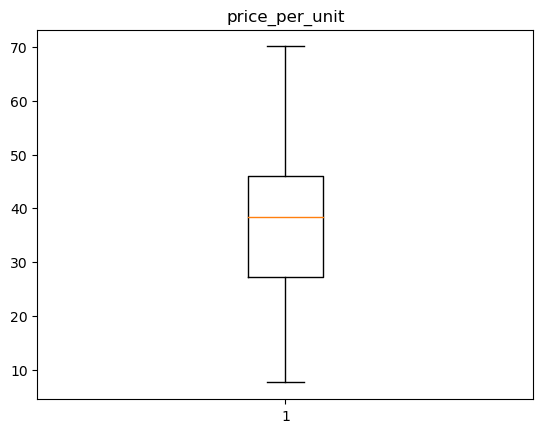

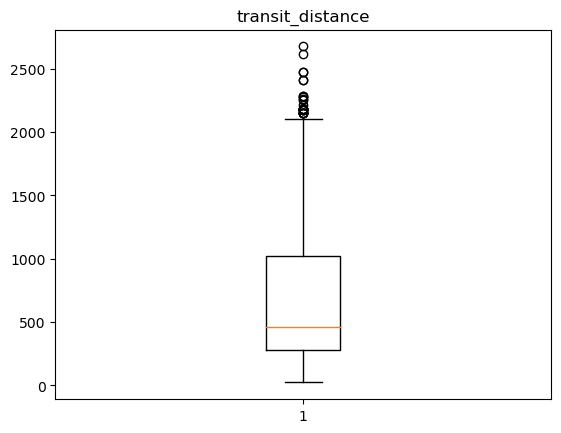

''

In [41]:
import numpy as np

print(df[df['price_per_unit'] > df['price_per_unit'].quantile(0.99)]['price_per_unit'].count())

plt.boxplot(df[df.price_per_unit <= df.price_per_unit.quantile(.99)].price_per_unit)
plt.title('price_per_unit')
plt.show()

plt.boxplot(df[df.transit_distance <= df.transit_distance.quantile(0.90)].transit_distance)
plt.title('transit_distance')
plt.show()
;

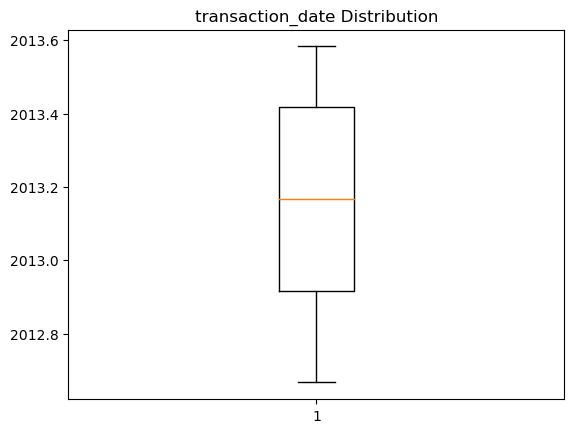

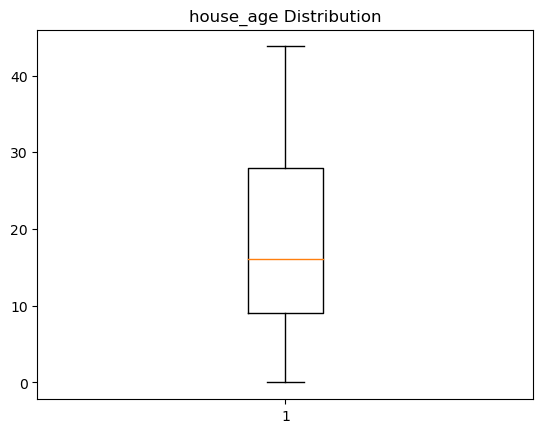

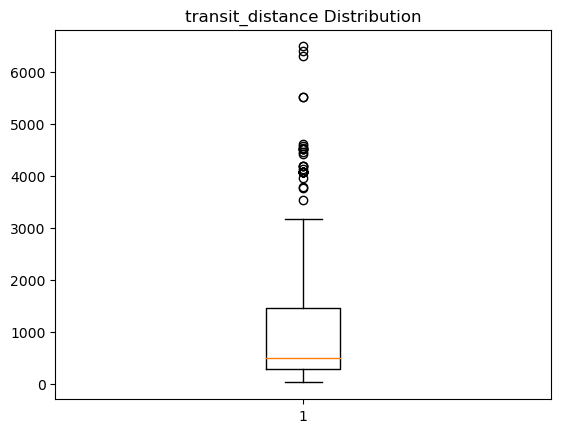

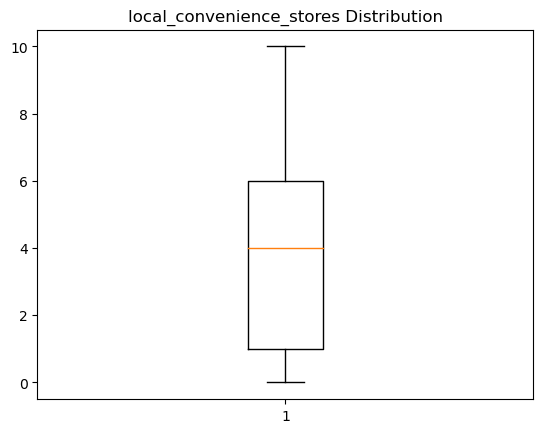

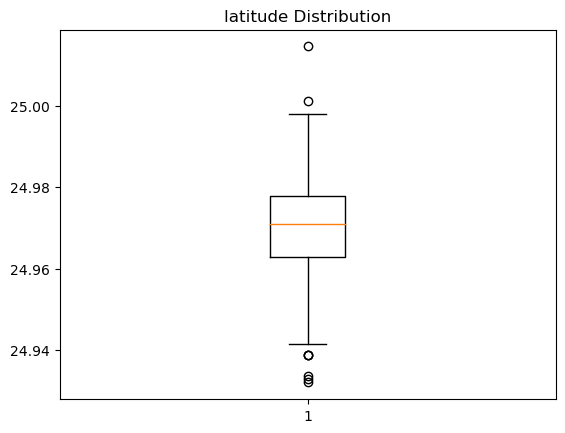

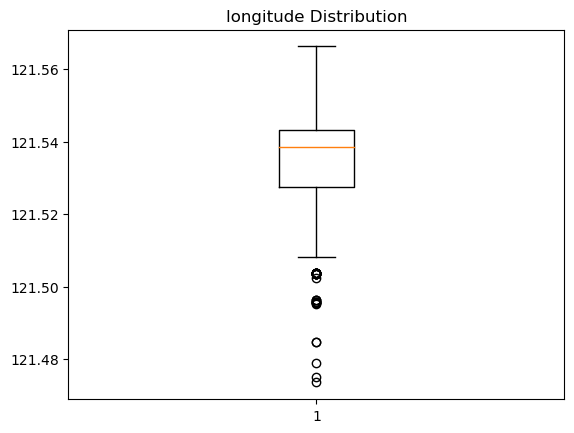

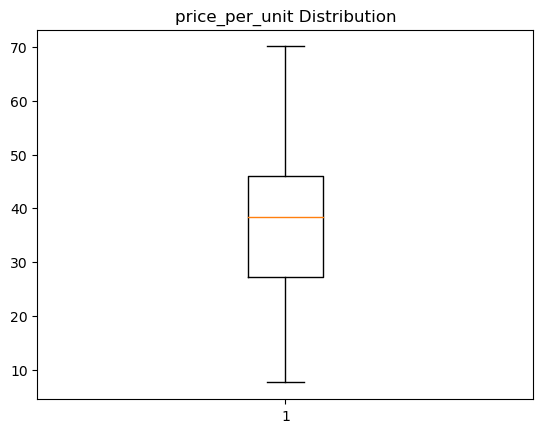

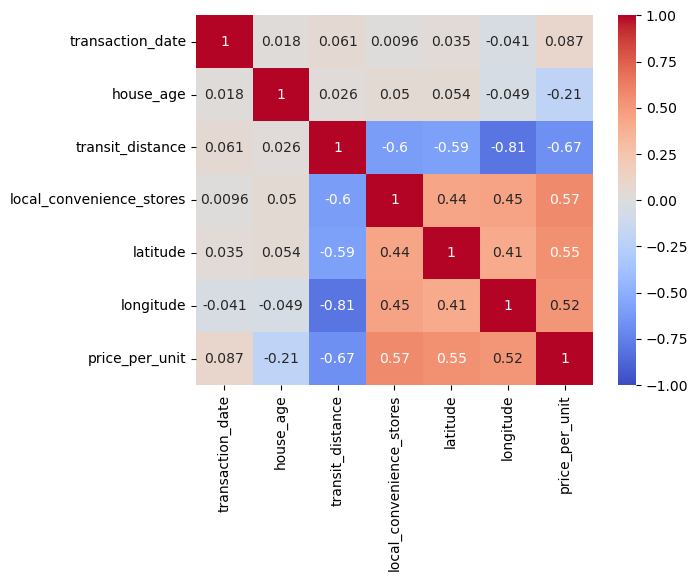

In [42]:
df_1 = df[df.price_per_unit <= df.price_per_unit.quantile(0.99)]

for col in df_1:
    features = df_1[[col]]
    plt.boxplot(features)
    plt.title(col + ' Distribution')
    plt.show()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.show()
df_1.describe() ;

# Outliers hava gone. Procced to train a regresion model

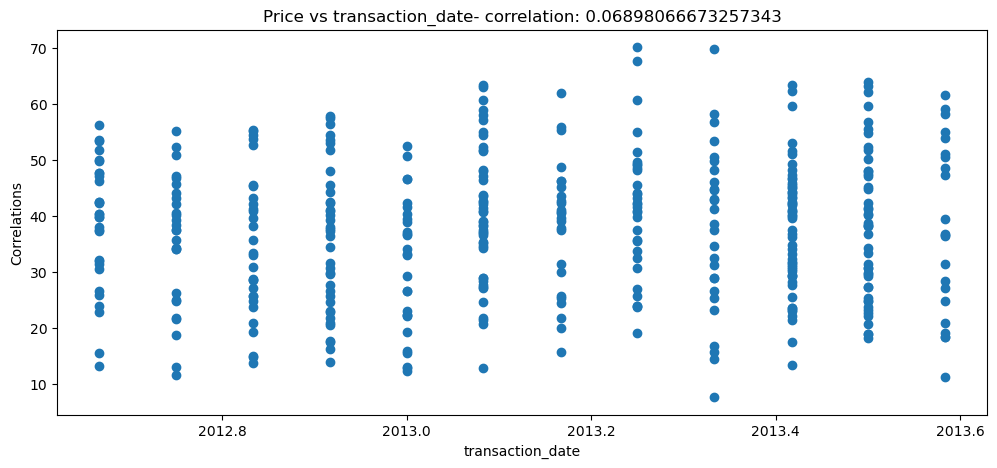

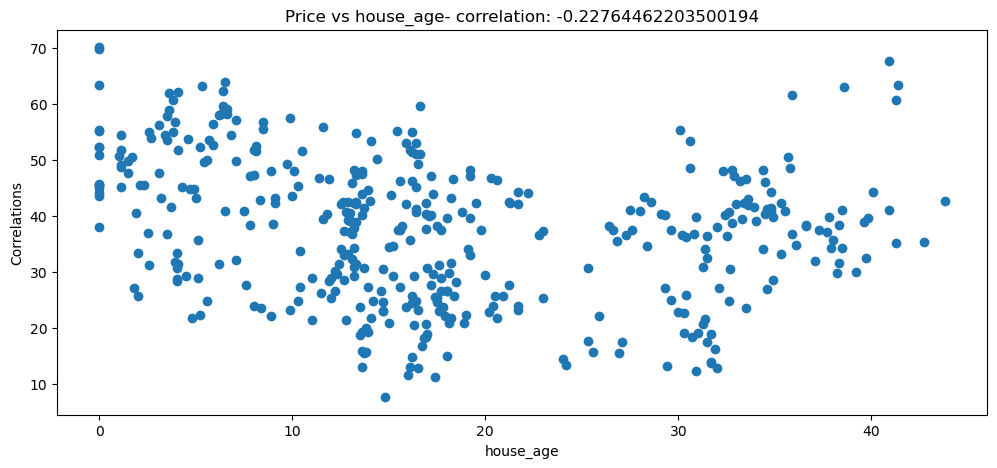

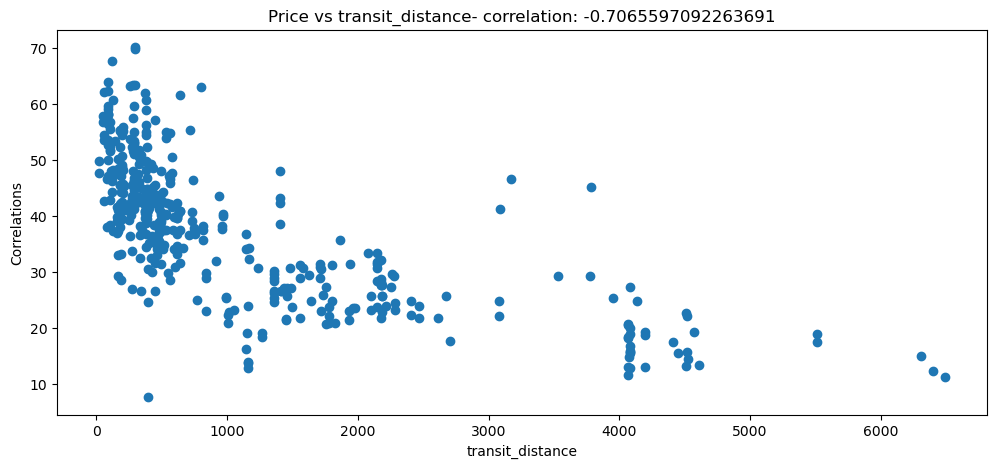

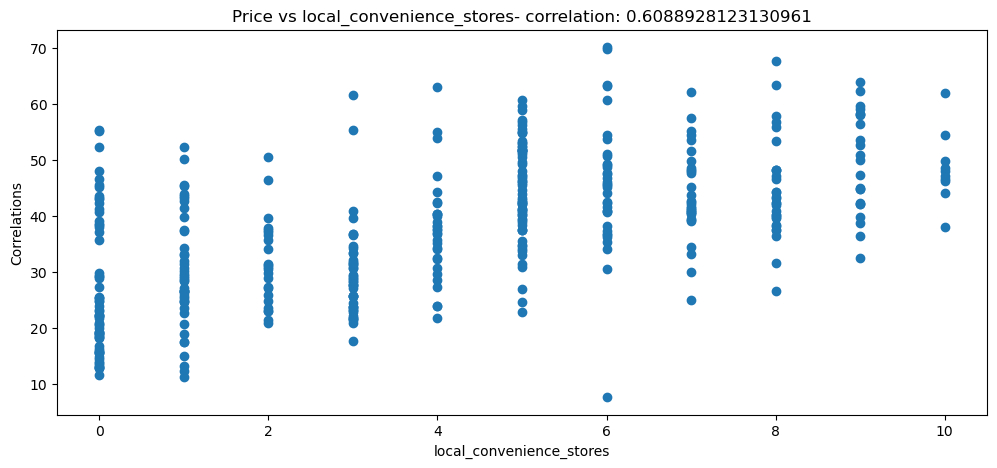

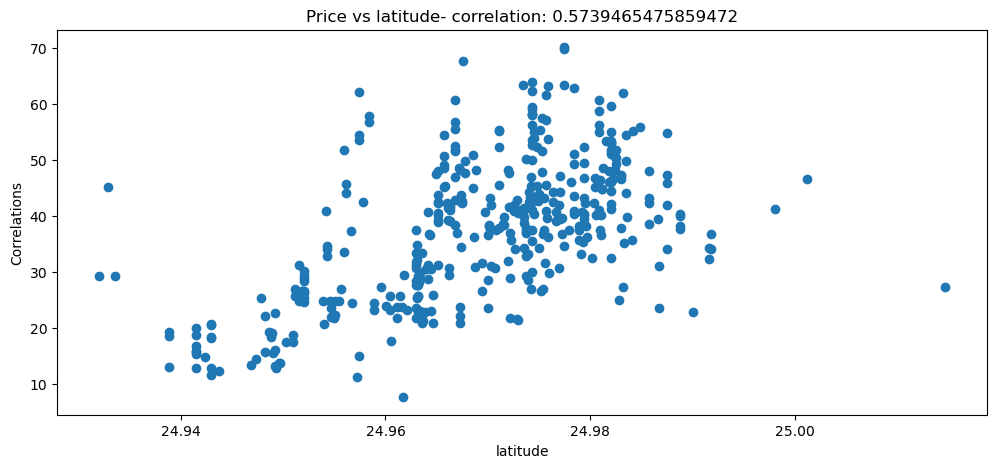

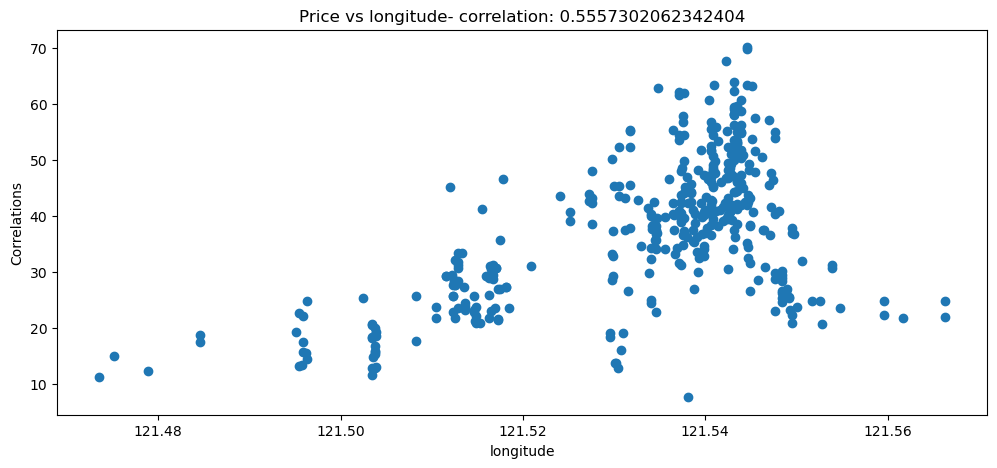

In [35]:

for col in df_1[df_1.columns[0:-1]]:
    #defining serie variables
    price = df_1['price_per_unit']
    fig = plt.figure(figsize=(12, 5))
    feature = df_1[col]
    #getting the person's corr
    correlation = feature.corr(price)
    #plotting price against all
    plt.scatter(x=feature, y=price)
    plt.xlabel(col)
    plt.ylabel('Correlations')
    plt.title('Price vs ' + col + '- correlation: ' + str(correlation))

plt.show()

<Figure size 1200x600 with 0 Axes>

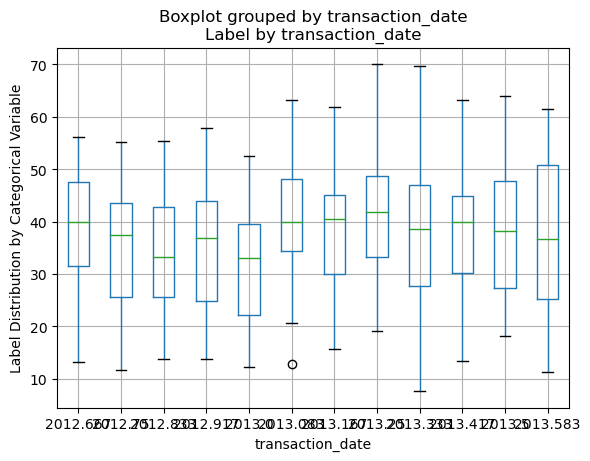

<Figure size 1200x600 with 0 Axes>

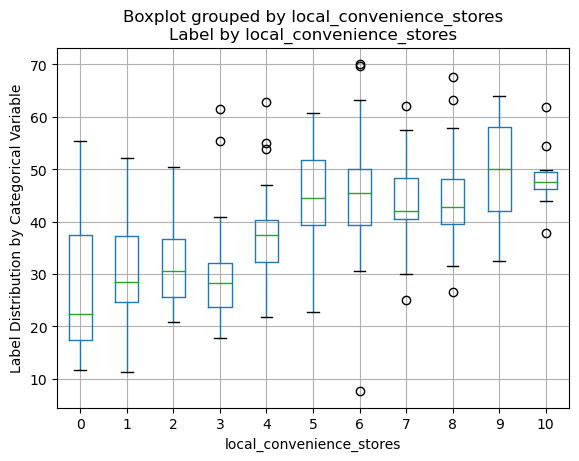

In [200]:
#creating boxplot for 'transaction_date' and 'local_convenience_stores' as they are categorical variables

for col in df_1[['transaction_date', 'local_convenience_stores']]:

    fig = plt.figure(figsize=(12, 6))
    df_1.boxplot(column = 'price_per_unit', by = col)
    plt.title('Label by ' + col)
    plt.ylabel("Label Distribution by Categorical Variable")
    
plt.show()


In [203]:
df_1.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


# Seems to be a positive correlation between 'prices per unit' and 'local_convenience_stores'

In [44]:
# Running a linear model

X, y = df_1[['house_age', 'transit_distance', 'local_convenience_stores', 'latitude', 'longitude']].values, df_1['price_per_unit'].values
print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')
print('------------------------------------------------------------')

from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Features:
[[3.2000000e+01 8.4878820e+01 1.0000000e+01 2.4982980e+01 1.2154024e+02]
 [1.9500000e+01 3.0659470e+02 9.0000000e+00 2.4980340e+01 1.2153951e+02]
 [1.3300000e+01 5.6198450e+02 5.0000000e+00 2.4987460e+01 1.2154391e+02]
 [1.3300000e+01 5.6198450e+02 5.0000000e+00 2.4987460e+01 1.2154391e+02]
 [5.0000000e+00 3.9056840e+02 5.0000000e+00 2.4979370e+01 1.2154245e+02]
 [7.1000000e+00 2.1750300e+03 3.0000000e+00 2.4963050e+01 1.2151254e+02]
 [3.4500000e+01 6.2347310e+02 7.0000000e+00 2.4979330e+01 1.2153642e+02]
 [2.0300000e+01 2.8760250e+02 6.0000000e+00 2.4980420e+01 1.2154228e+02]
 [3.1700000e+01 5.5120380e+03 1.0000000e+00 2.4950950e+01 1.2148458e+02]
 [1.7900000e+01 1.7831800e+03 3.0000000e+00 2.4967310e+01 1.2151486e+02]]

Labels:
[37.9 42.2 47.3 54.8 43.1 32.1 40.3 46.7 18.8 22.1]
------------------------------------------------------------
Training Set: 286 rows
Test Set: 123 rows


In [47]:
import numpy as np

predictions = model.predict(X_test)
np.set_printoptions(suppress=True) #It supress the use of exponential notation 
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [38. 30. 46. 52. 47. 40. 33. 25. 32. 37.]
Actual labels   :  [21.7 38.4 55.  44.9 54.4 28.5 23.9 24.7 21.3 39. ]


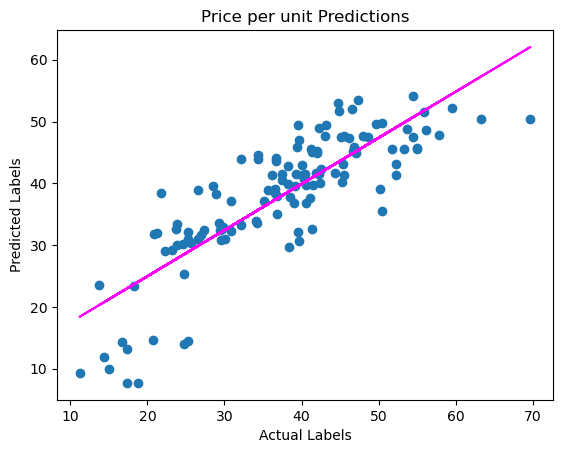

In [48]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Price per unit Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [53]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f"MSE: {mse} \nRMSE: {rmse} \nR2: {r2}")

MSE: 43.01576372402363 
RMSE: 6.558640386850283 
R2: 0.6781479656323041


# Trying with another algorithm

Lasso() 

MSE = 46.65280247640091 
RMSE = 6.8302856804383305 
r2 = 0.6509349576513945


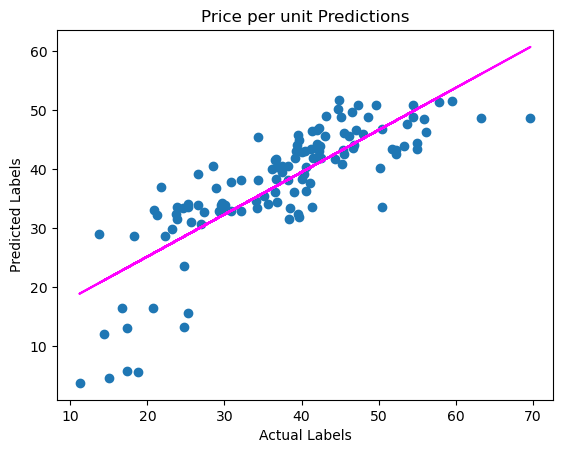

In [54]:
from sklearn.linear_model import Lasso

# Fit a lasso model on the training set
model = Lasso().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)
print(f"MSE = {mse} \nRMSE = {rmse} \nr2 = {r2}")

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Price per unit Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

# Running a desicion tree

In [235]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# Train the model
model = DecisionTreeRegressor().fit(X_train, y_train)
print (model, "\n")

# Visualize the model tree
tree = export_text(model)
print(tree)

DecisionTreeRegressor() 

|--- feature_2 <= 826.83
|   |--- feature_1 <= 10.25
|   |   |--- feature_2 <= 97.63
|   |   |   |--- feature_0 <= 2013.00
|   |   |   |   |--- feature_1 <= 2.45
|   |   |   |   |   |--- value: [47.70]
|   |   |   |   |--- feature_1 >  2.45
|   |   |   |   |   |--- feature_0 <= 2012.75
|   |   |   |   |   |   |--- feature_1 <= 5.65
|   |   |   |   |   |   |   |--- value: [50.00]
|   |   |   |   |   |   |--- feature_1 >  5.65
|   |   |   |   |   |   |   |--- value: [53.50]
|   |   |   |   |   |--- feature_0 >  2012.75
|   |   |   |   |   |   |--- feature_0 <= 2012.88
|   |   |   |   |   |   |   |--- feature_3 <= 8.00
|   |   |   |   |   |   |   |   |--- value: [54.40]
|   |   |   |   |   |   |   |--- feature_3 >  8.00
|   |   |   |   |   |   |   |   |--- value: [52.70]
|   |   |   |   |   |   |--- feature_0 >  2012.88
|   |   |   |   |   |   |   |--- feature_3 <= 8.00
|   |   |   |   |   |   |   |   |--- value: [53.50]
|   |   |   |   |   |   |   |--- feature_3

MSE = 46.65280247640091 
RMSE = 6.8302856804383305 
r2 = 0.6509349576513945


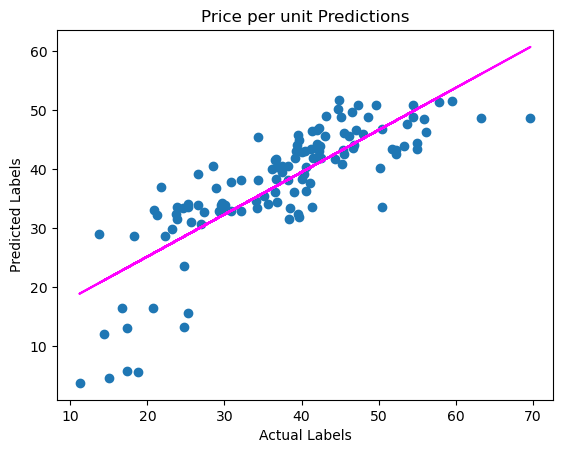

In [56]:
# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)
print(f"MSE = {mse} \nRMSE = {rmse} \nr2 = {r2}")

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Price per unit Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

# Try an enseble algorithm

RandomForestRegressor() 

MSE = 27.099475639428537 
RMSE = 5.205715670244442 
r2 = 0.7972366265351978


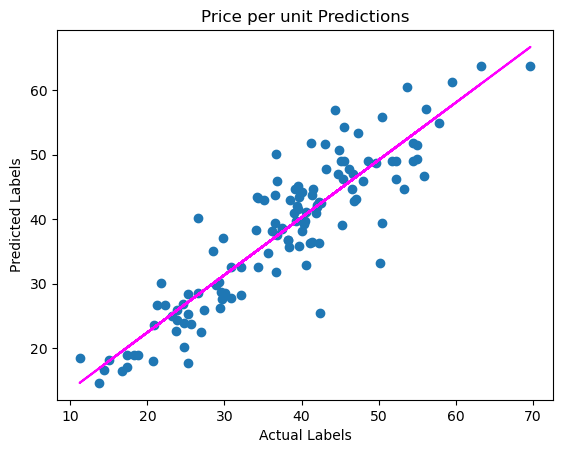

In [58]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
model = RandomForestRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)
print(f"MSE = {mse} \nRMSE = {rmse} \nr2 = {r2}")

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Price per unit Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

# Boosting ensable algorithm

GradientBoostingRegressor() 

MSE: 29.18266507236831
RMSE: 5.402098210174294
R2: 0.7816498114023422


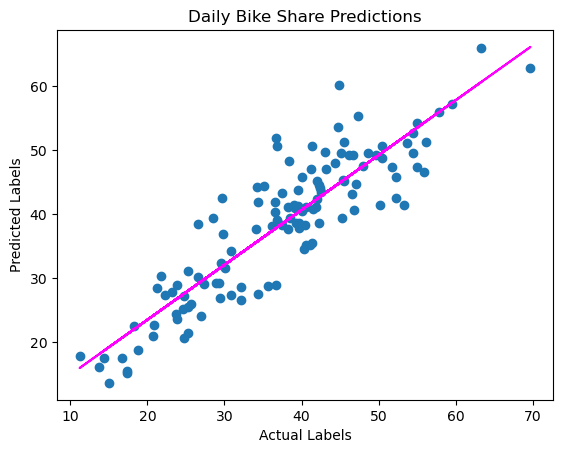

In [238]:
# Train the model
from sklearn.ensemble import GradientBoostingRegressor

# Fit a lasso model on the training set
model = GradientBoostingRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Price per unit Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

GradientBoostingRegressor() 

MSE: 25.828217597138163
RMSE: 5.082146947613594
R2: 0.8067484182993166


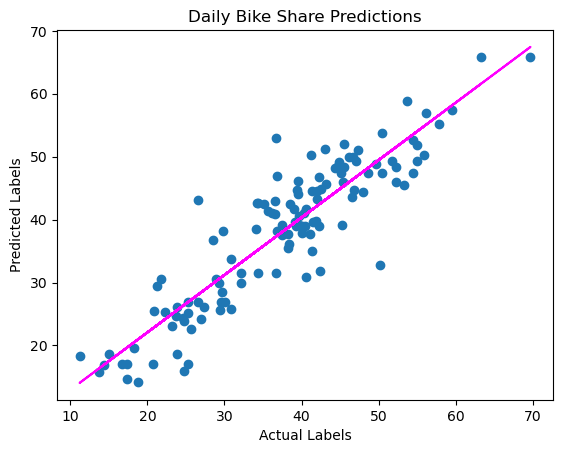

In [61]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor


# Fit a lasso model on the training set
model = GradientBoostingRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

# (Algorithm's name) algorithm

Best parameter combination: {'learning_rate': 0.1, 'n_estimators': 50} 

GradientBoostingRegressor(n_estimators=50) 

MSE: 27.695613587550728
RMSE: 5.262662214844378
R2: 0.7927762102887752


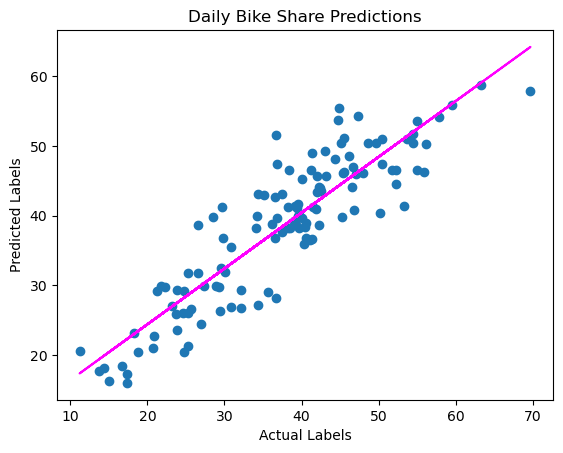

In [252]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Use a Gradient Boosting algorithm
alg = GradientBoostingRegressor()

# Try these hyperparameter values
params = {
 'learning_rate': [0.1, 0.5, 1.0],
 'n_estimators' : [50, 100, 150]
 }

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")

# Get the best model
model=gridsearch.best_estimator_
print(model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

# From here is not my code

In [261]:
from sklearn.model_selection import train_test_split

# Separate features (columns 1 [house_age] to the last but one) and labels (the last column)
X, y = df_1[df_1.columns[1:-1]].values, df_1[df_1.columns[-1]].values

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d, rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 286, rows
Test Set: 123 rows


In [262]:
# Train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Define preprocessing for numeric columns (scale them)
numeric_features = [0,1,3,4]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
    ])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 3, 4])])),
                ('regressor', RandomForestRegressor())])


MSE: 28.168194555775617
RMSE: 5.307371718259012
R2: 0.7892402706039082


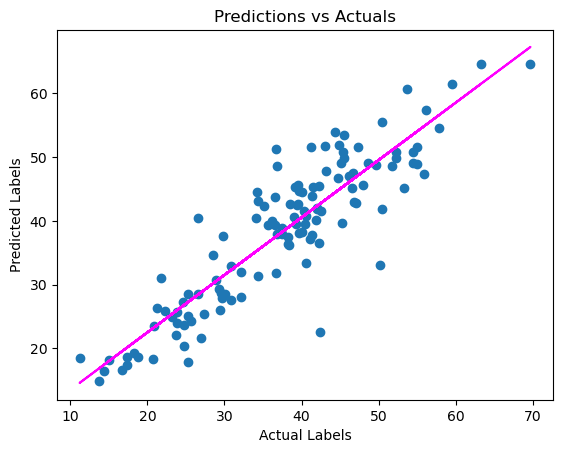

In [263]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predictions vs Actuals')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [264]:
import joblib

# Save the model as a pickle file
filename = './price_per_uni.pkl'
joblib.dump(model, filename)

# Load the model from the file
loaded_model = joblib.load(filename)

# An array of features for each transaction (don't include the transaction date)
X_new = np.array([[16.2,289.3248,5,24.98203,121.54348],
                  [13.6,4082.015,0,24.94155,121.5038]])

# Use the model to predict unit price
results = loaded_model.predict(X_new)
print('Predictions:')
for prediction in results:
    print(round(prediction,2))


Predictions:
48.92
15.96


# Bonus, creating a function for evaluate and plotting

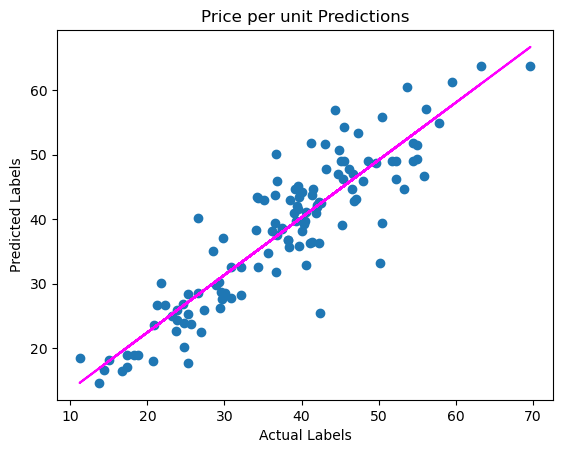

In [60]:
predictions = model.predict(X_test)

def evaluate_plot(a,b):
    mmse = mean_squared_error(a, b)
    rmse = np.sqrt(mse)
    r2 = r2_score(a, b)

    # Plot predicted vs actual
    plt.scatter(a, b)
    plt.xlabel('Actual Labels')
    plt.ylabel('Predicted Labels')
    plt.title('Price per unit Predictions')
    # overlay the regression line
    z = np.polyfit(a, b, 1)
    p = np.poly1d(z)
    plt.plot(a,p(a), color='magenta')
    plt.show() 
    
evaluate_plot(y_test, predictions)

In [99]:
import pandas as pd
from pandas import array

x = array([1,2,3,4,5])
#y = [31:60]
z = pd.DataFrame(x, y).reset_index()
print(z)

model_1 = LinearRegression().fit(x, y)
print(model_1)


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

   index  0
0      6  1
1      7  2
2      8  3
3      9  4
4     10  5


ValueError: Expected 2D array, got 1D array instead:
array=[1 2 3 4 5].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [1]:
print("hola mundo")

hola mundo
